## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report 

## Loading the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [4]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

## Print count of each label in Purchased column

In [5]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [6]:
cor = df.corr().style.background_gradient(cmap="RdBu_r")

In [7]:
cor

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Train the model with random_state = 0

In [9]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Print the prediction results

In [10]:
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Create dataframe with the Actual Purchased and Predict Purchased

In [11]:
new_df = X_test
new_df['Actual'] = y_test
new_df['Predicted'] = y_pred
new_df

,Age,EstimatedSalary,Actual,Predicted
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [12]:
TF = new_df.apply(lambda x: 'True' if x['Actual'] == x['Predicted'] else 'False', axis=1)
TF.value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [13]:
print(confusion_matrix(new_df['Predicted'], new_df['Actual']).T)

[[68  0]
 [32  0]]


In [14]:
print(classification_report(new_df['Predicted'], new_df['Actual']))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       100
           1       0.00      0.00      0.00         0

    accuracy                           0.68       100
   macro avg       0.50      0.34      0.40       100
weighted avg       1.00      0.68      0.81       100



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

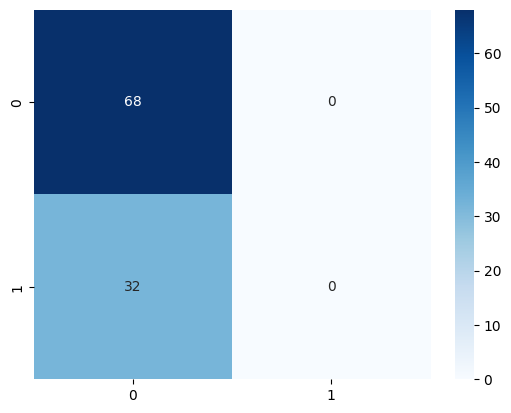

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_pred, y_test).T

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

## Use StandardScaler() to improved performance and re-train your model

In [16]:
X_test.drop(['Actual', 'Predicted'], axis=1, inplace=True)
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
146,27,96000
135,23,63000
390,48,33000
264,48,90000


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [18]:
LR.fit(X_train_sc,y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = LR.predict(X_test_sc)

In [20]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred).T)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

[[65  8]
 [ 3 24]]


## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [21]:
new_values = np.array([[30, 90_000]])
new_values_sc = sc.fit_transform(new_values)
p1_result = LR.predict(new_values_sc)
p1_result

array([0])

## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [22]:
new_values1 = np.array([[40, 90_000]])
new_values_sc = sc.fit_transform(new_values1)
p1_result = LR.predict(new_values_sc)
p1_result

array([0])